In [173]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('ml_data.csv')

In [144]:
df.head()

,type_of_property,price,building_condition,facade_number,living_area,equipped_kitchen,terrace,garden,km_to_capital
0,0,149000.0,2,2.0,48,1,9,0,3.33
1,0,248000.0,2,2.0,91,1,2,0,3.91
2,0,229000.0,2,2.0,100,0,26,0,6.62
3,0,470000.0,2,2.0,179,1,10,0,5.29
4,0,480000.0,2,2.0,116,1,7,0,1.07


In [167]:
X = df.drop(['price'], axis=1).values

y = df['price'].values
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [168]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [169]:
X_train.shape

(15537, 8)

In [170]:
model = Sequential()
model.add(Dense(64, input_shape=(8,)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

c:\Users\celin\OneDrive\Desktop\Bootcamp\mlenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [164]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
486/486 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 459470766080.0000 - mae: 476909.7188 - val_loss: 474317586432.0000 - val_mae: 489189.8438
Epoch 2/100
486/486 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 452065165312.0000 - mae: 475073.0312 - val_loss: 466215272448.0000 - val_mae: 482225.1562
Epoch 3/100
486/486 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 433275305984.0000 - mae: 463316.2188 - val_loss: 443486568448.0000 - val_mae: 461357.5000
Epoch 4/100
486/486 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 394675191808.0000 - mae: 437984.3750 - val_loss: 407288610816.0000 - val_mae: 425088.9375
Epoch 5/100
486/486 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 383653675008.0000 - mae: 400847.0312 - val_loss: 364343787520.0000 - val_mae: 378300.6875
Epoch 6/100
486/486 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 337796431872.0000 - mae: 354822.4062 - val_loss: 321549664256.0000 - val_mae: 330244.9688
Epoch 7/100
486/486 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 310676291584.0000 - mae: 313400.8

In [165]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

Test Loss: 176215195648.0
Test MAE: 206382.6875


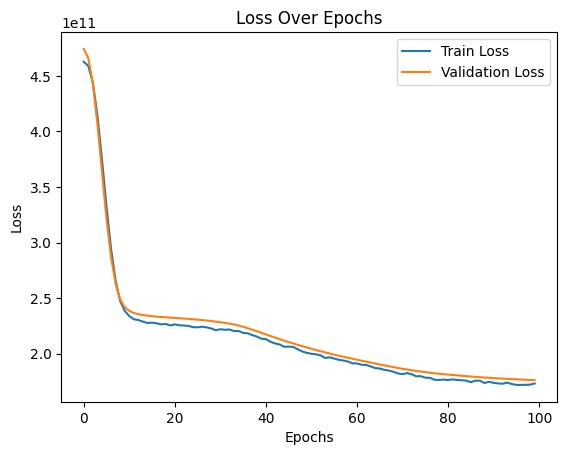

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [187]:
actual = pd.DataFrame(y_test)
actual

,0
0,257060.0
1,1780000.0
2,299000.0
3,2495000.0
4,587000.0
...,...
3880,445000.0
3881,679000.0
3882,465000.0
3883,740000.0


In [185]:
# make predictions
predictions = model.predict(X_test)

#results = pd.DataFrame({"Actual": y_test, "Predicted": predictions.flatten()})
#print(results.head())

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [186]:
predictions_df = pd.DataFrame(predictions)
predictions_df

,0
0,-0.280757
1,-0.532763
2,-0.194929
3,-0.422193
4,-0.181396
...,...
3880,-0.078145
3881,-0.171177
3882,-0.253547
3883,0.161760
